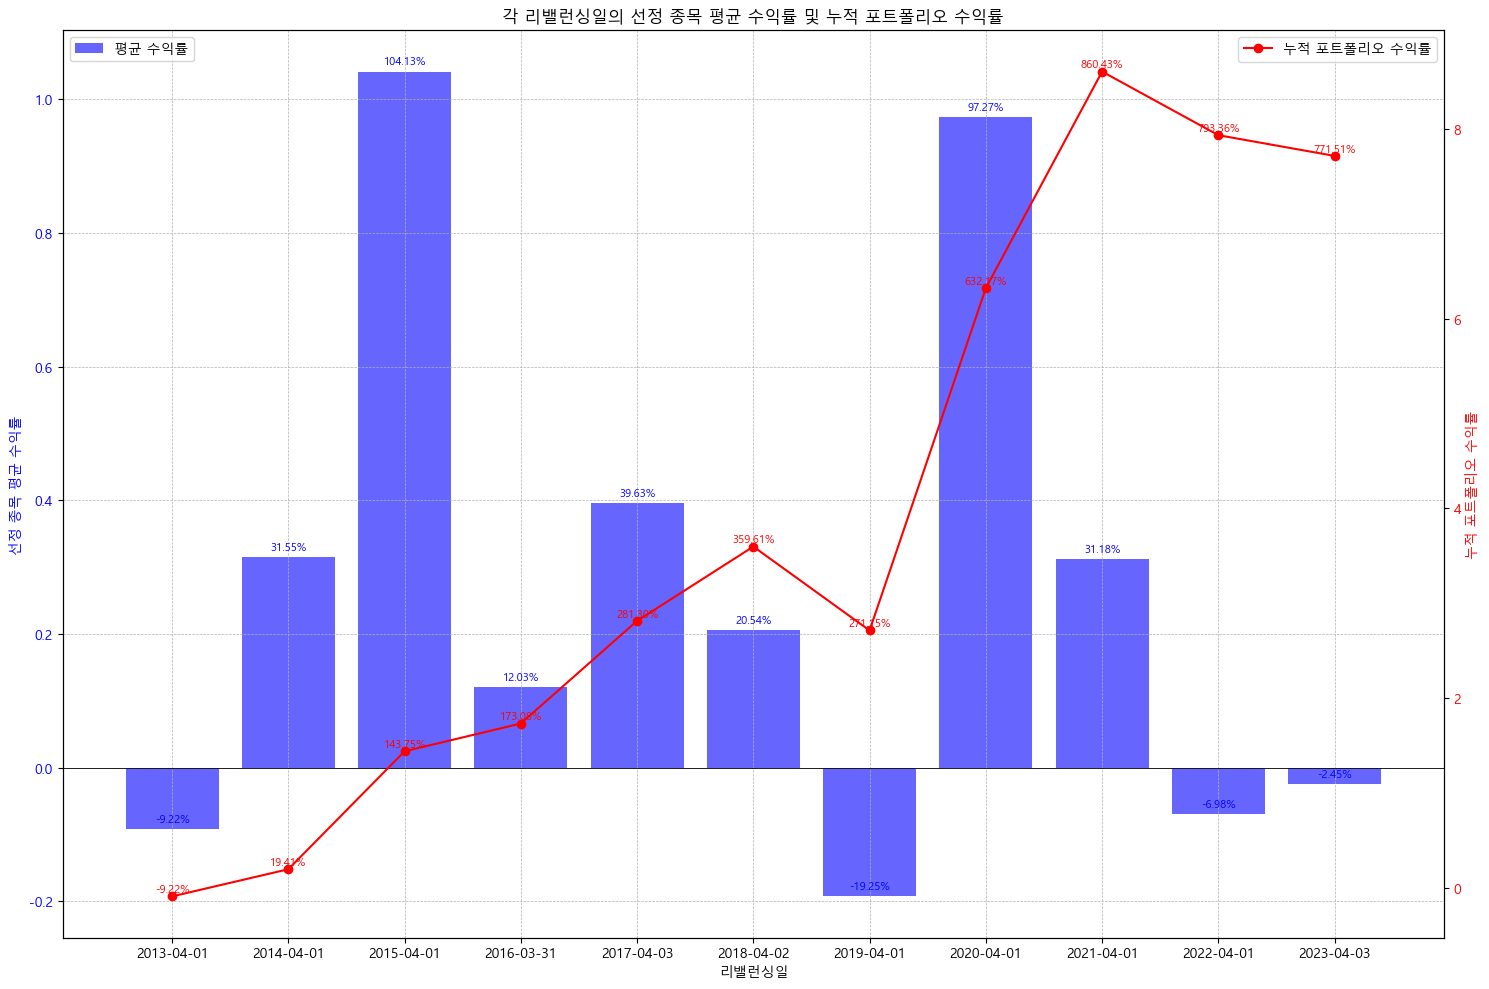

In [57]:
# Long Term Returns 30% Drop.png

# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터 로드하기
close_df = pd.read_csv('close_df.csv')

# 리밸런싱일 정의하기
rebalancing_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', '2018-04-02', '2019-04-01', 
                     '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']

# 각 리밸런싱일에 선정된 종목과 그 종목들의 수익률을 저장할 딕셔너리 초기화
held_stocks_dict = {}
stock_returns_dict = {}

# 각 리밸런싱일마다 종목 선정 및 수익률 계산
for idx, date in enumerate(rebalancing_dates):
        start_date = pd.to_datetime(date) - pd.DateOffset(years=1)
        end_date = pd.to_datetime(date)
    
        # 해당 기간의 데이터만 추출
        period_df = close_df[(close_df['Date'] >= start_date.strftime('%Y-%m-%d')) & (close_df['Date'] < end_date.strftime('%Y-%m-%d'))].drop(columns='Date')
        
        # 가격이 30% 이상 하락한 종목 찾기
        price_drop = (period_df.iloc[-1] - period_df.iloc[0]) / period_df.iloc[0]
        dropped_stocks = price_drop[price_drop <= -0.30].index.tolist()
        
        # 해당 종목들의 변동성 계산
        volatility = period_df[dropped_stocks].iloc[-60:].std()
        
        # 변동성이 낮은 종목 10개 선정
        selected_stocks = volatility.nsmallest(10).index.tolist() if len(volatility) >= 10 else volatility.index.tolist()
        
        # 선정된 종목 저장
        held_stocks_dict[date] = selected_stocks
        
        # 선정된 종목의 다음 기간 수익률 계산
        next_date = rebalancing_dates[idx + 1] if idx + 1 < len(rebalancing_dates) else close_df['Date'].max()
        next_period_df = close_df[(close_df['Date'] >= date) & (close_df['Date'] <= next_date)].drop(columns='Date')
        returns = (next_period_df[selected_stocks].iloc[-1] - next_period_df[selected_stocks].iloc[0]) / next_period_df[selected_stocks].iloc[0]
        
        # 종목별 수익률 저장
        stock_returns_dict[date] = returns

    # 각 리밸런싱일에 선정된 종목들의 평균 수익률 계산
portfolio_returns = {date: np.mean(returns) for date, returns in stock_returns_dict.items()}

# 누적 포트폴리오 수익률 계산
cumulative_portfolio_returns = [np.prod([1 + ret for ret in portfolio_returns.values()][:i+1]) - 1 for i in range(len(portfolio_returns))]

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(15, 10))

# 각 리밸런싱일에 선정된 종목들의 평균 수익률 막대그래프로 그리기
bars = ax1.bar(portfolio_returns.keys(), portfolio_returns.values(), color='blue', label='평균 수익률', alpha=0.6)
ax1.set_title('각 리밸런싱일의 선정 종목 평균 수익률 및 누적 포트폴리오 수익률')
ax1.set_xlabel('리밸런싱일')
ax1.set_ylabel('선정 종목 평균 수익률', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.axhline(0, color='black', linewidth=0.6)

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8, color='blue')

# 포트폴리오의 누적 수익률 선그래프로 그리기
ax2 = ax1.twinx()
lines, = ax2.plot(list(portfolio_returns.keys()), cumulative_portfolio_returns, color='red', label='누적 포트폴리오 수익률', marker='o')
ax2.set_ylabel('누적 포트폴리오 수익률', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 선 위에 수치 표시
for i, txt in enumerate(cumulative_portfolio_returns):
    ax2.annotate(f'{txt:.2%}', 
                 (list(portfolio_returns.keys())[i], cumulative_portfolio_returns[i]), 
                 textcoords="offset points", 
                 xytext=(0,3), 
                 ha='center', fontsize=8, color='red')

# 범례 표시
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [59]:
# 종목코드와 기업명 매핑 코드
stock_codes_by_date ={
    '2013-04-01': ['003310', '000300', '035620', '065440', '008600', '068050', '010170', '011930', '002900', '090080'],
    '2014-04-01': ['036630', '006200', '102280', '038620', '128660', '094860', '004060', '019180', '036090', '067630'],
    '2015-04-01': ['012030', '082800', '137940', '094860', '131400', '052020', '054090', '076080', '052300', '042940'],
    '2016-03-31': ['005030', '015590', '018000', '088290', '002360', '077500', '126560', '024900', '009810', '012610'],
    '2017-04-03': ['012160', '000180', '006490', '006340', '002880', '052460', '038110', '082850', '099410', '053280'],
    '2018-04-02': ['031820', '004060', '000300', '038620', '096350', '015020', '027970', '001620', '003720', '090150'],
    '2019-04-01': ['015590', '051780', '050090', '082850', '004920', '005030', '049470', '007530', '054630', '037400'],
    '2020-04-01': ['096350', '001620', '005030', '000300', '036630', '002880', '018470', '012030', '008970', '006200'],
    '2021-04-01': ['051780', '009810', '101400', '009460', '025560', '040350', '065950', '044480', '043200', '064090'],
    '2022-04-01': ['015590', '000040', '050090', '027740', '036630', '053060', '004870', '036120', '005110', '050110'],
    '2023-04-03': ['004410', '094860', '096350', '058400', '000890', '102280', '033540', '000040', '004060', '035890']
}
from pykrx import stock

def get_company_names_from_pykrx(stock_codes):
    company_names_mapping = {}
    for code in stock_codes:
        company_name = stock.get_market_ticker_name(code)
        if company_name:
            company_names_mapping[code] = company_name
    return company_names_mapping

# 종목코드 리스트
stock_codes = [code for sublist in stock_codes_by_date.values() for code in sublist]
company_names = get_company_names_from_pykrx(stock_codes)
print(company_names)

{'003310': '대주산업', '000300': '대유플러스', '035620': '바른손이앤에이', '065440': '이루온', '008600': '윌비스', '068050': '팬엔터테인먼트', '010170': '대한광통신', '011930': '신성이엔지', '002900': 'TYM', '090080': '평화산업', '036630': '세종텔레콤', '006200': '한국전자홀딩스', '102280': '쌍방울', '038620': '위즈코프', '128660': '피제이메탈', '094860': '네오리진', '004060': 'SG세계물산', '019180': '티에이치엔', '036090': '위지트', '067630': 'HLB생명과학', '012030': 'DB', '082800': '비보존 제약', '137940': '넥스트아이', '131400': '이브이첨단소재', '052020': '에스티큐브', '054090': '삼진엘앤디', '076080': '웰크론한텍', '052300': '씨티프라퍼티', '042940': '상지카일룸', '005030': '부산주공', '015590': 'KIB플러그에너지', '018000': '유니슨', '088290': '이원컴포텍', '002360': 'SH에너지화학', '077500': '유니퀘스트', '126560': '현대퓨처넷', '024900': '덕양산업', '009810': '플레이그램', '012610': '경인양행', '012160': '영흥', '000180': '성창기업지주', '006490': '인스코비', '006340': '대원전선', '002880': '대유에이텍', '052460': '아이크래프트', '038110': '에코플라스틱', '082850': '우리바이오', '099410': '동방선기', '053280': '예스24', '031820': '콤텍시스템', '096350': '대창솔루션', '015020': '이스타코', '027970': '한국제지', '

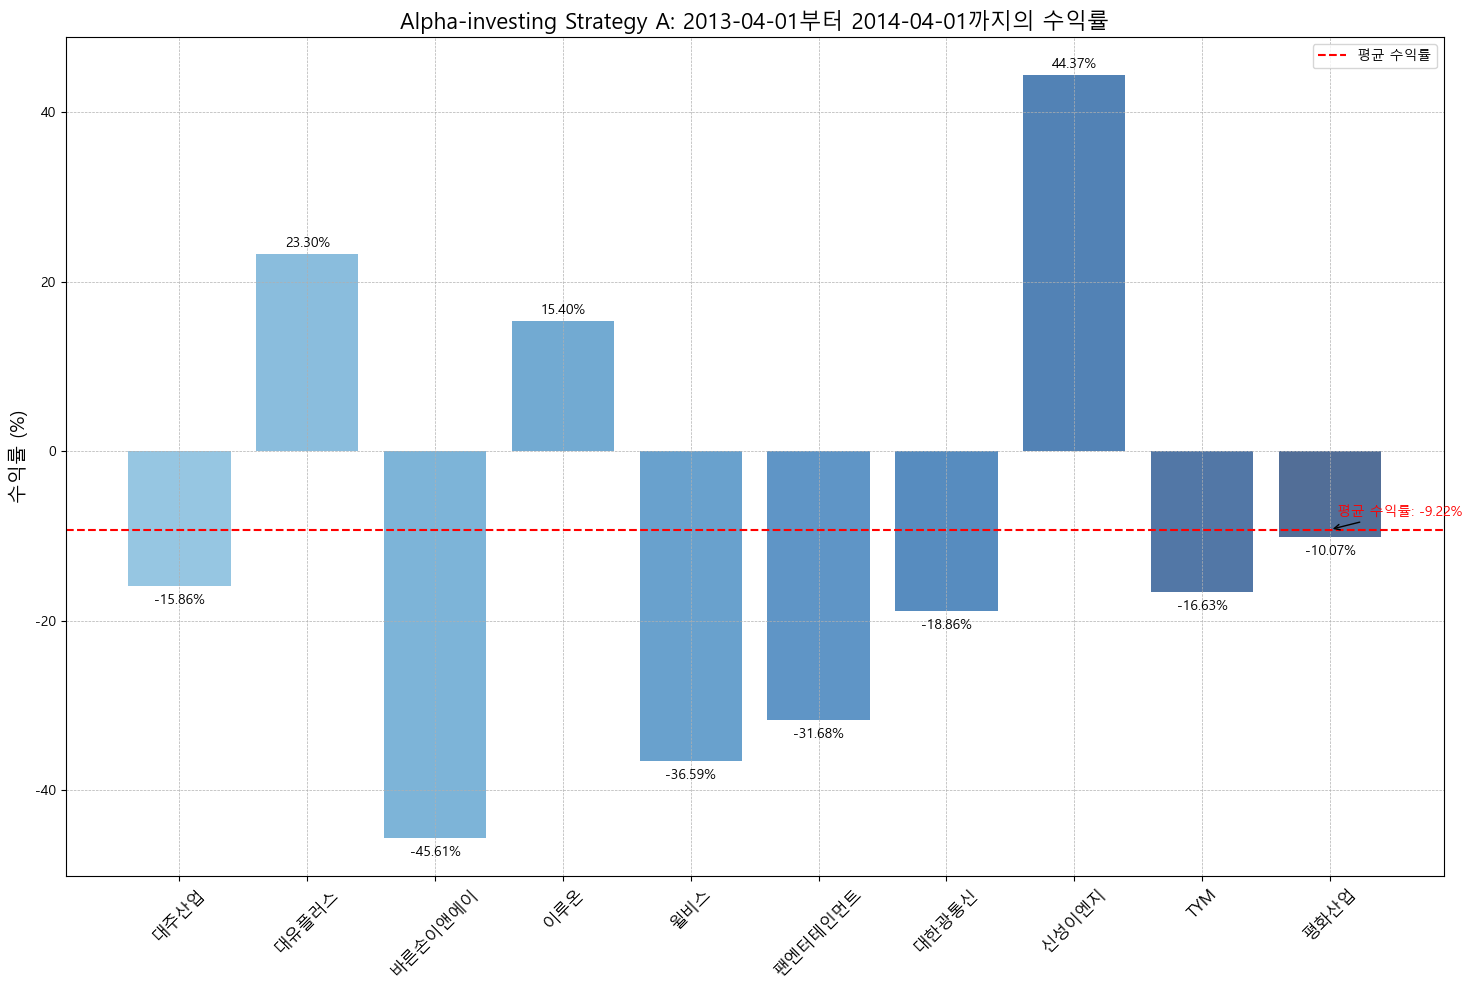

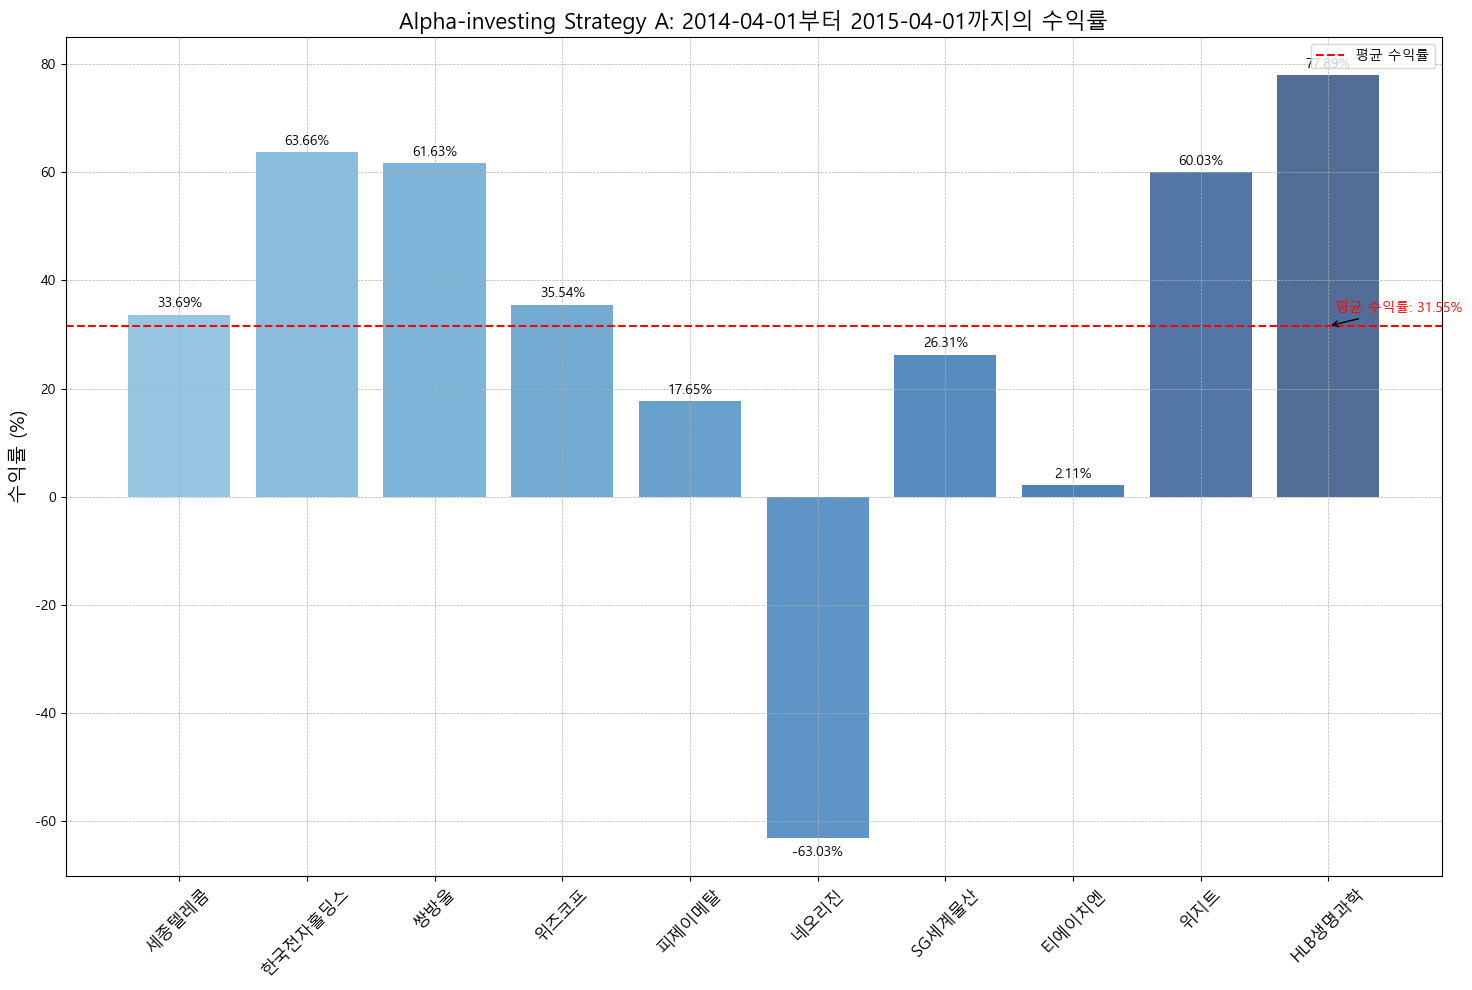

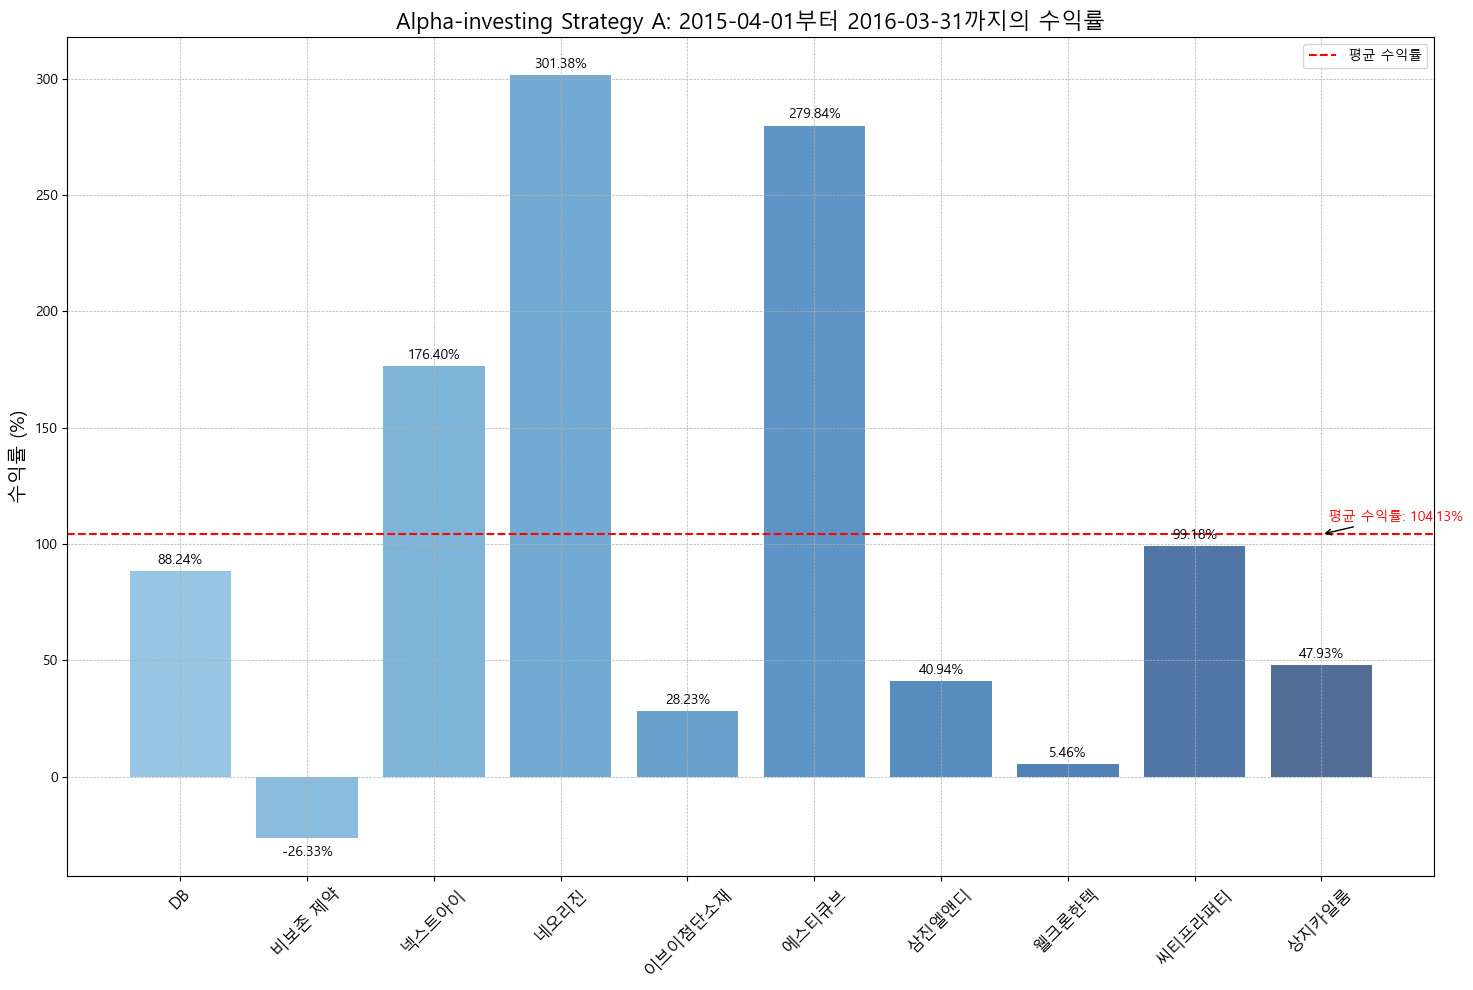

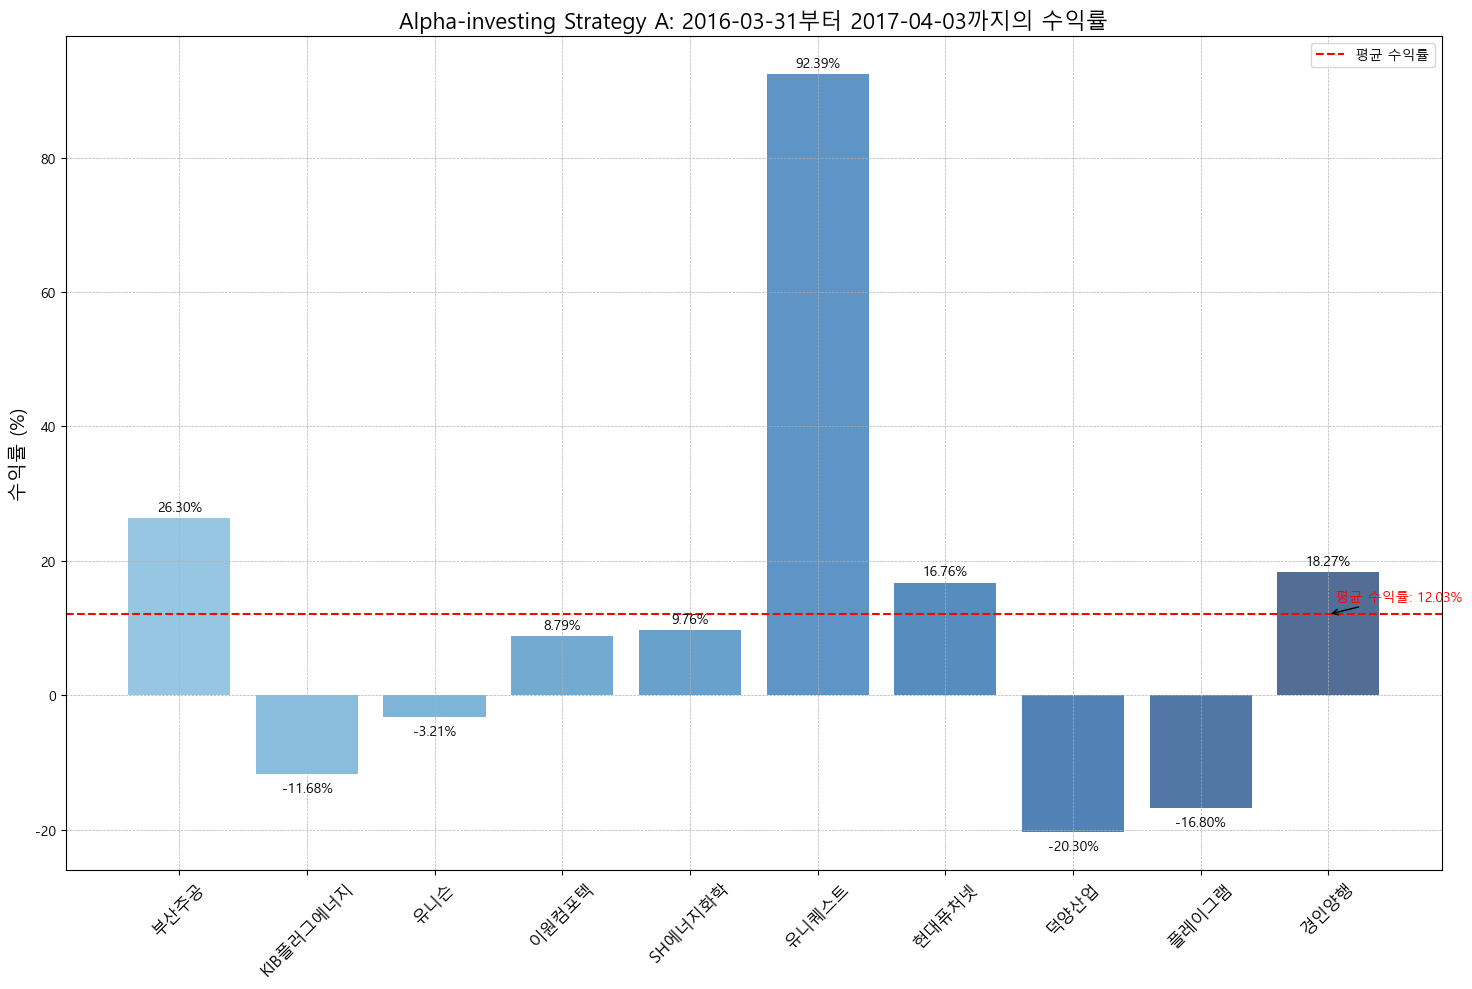

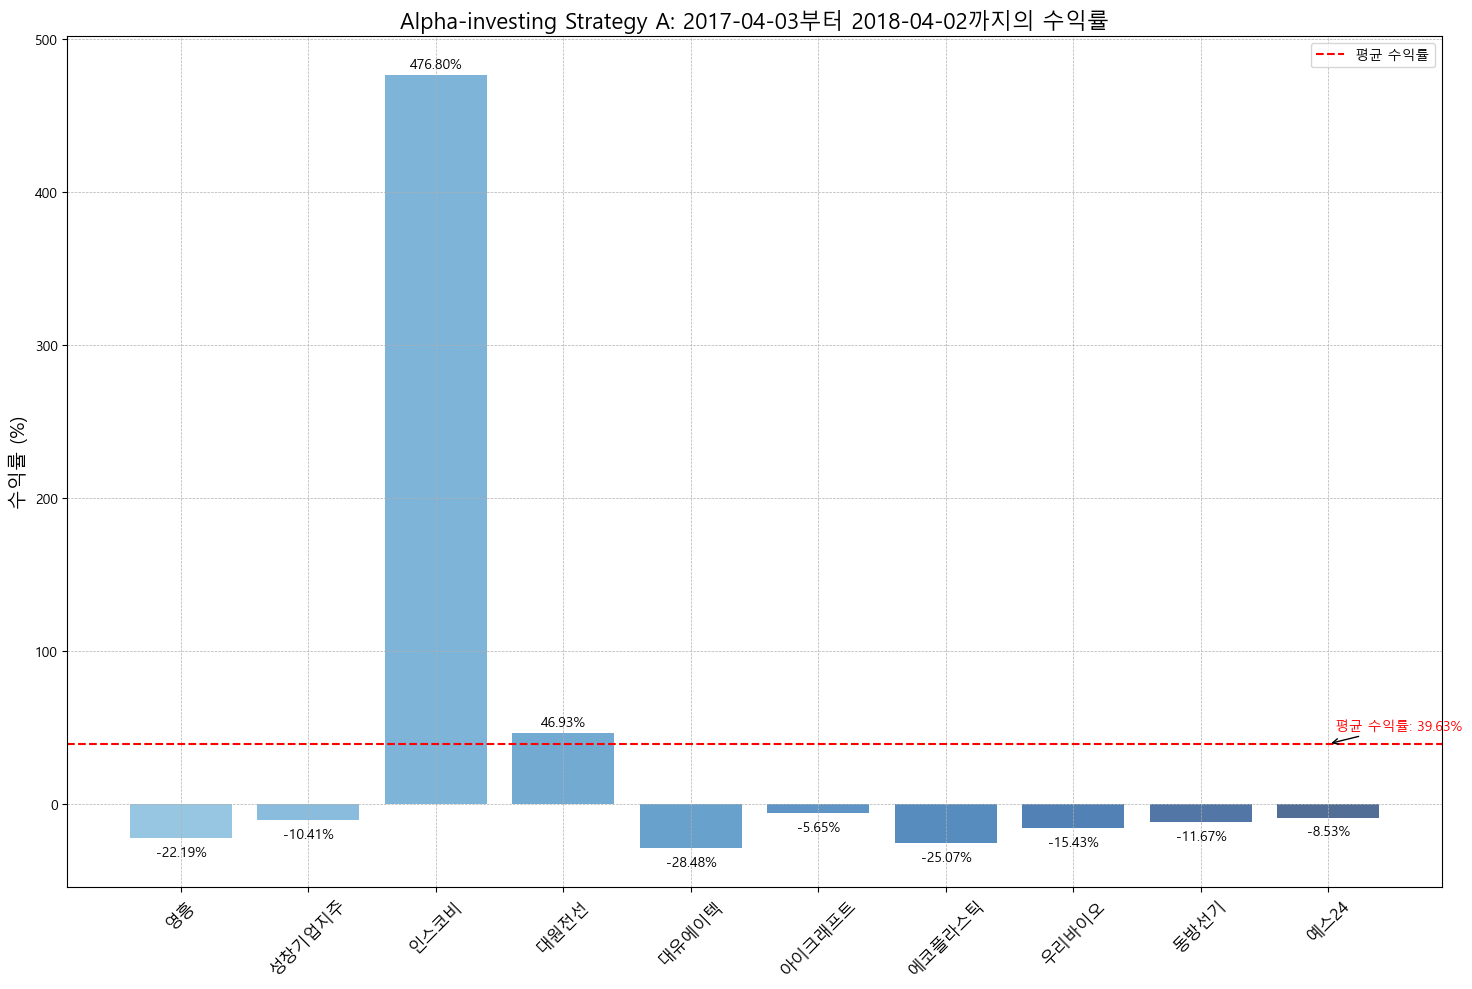

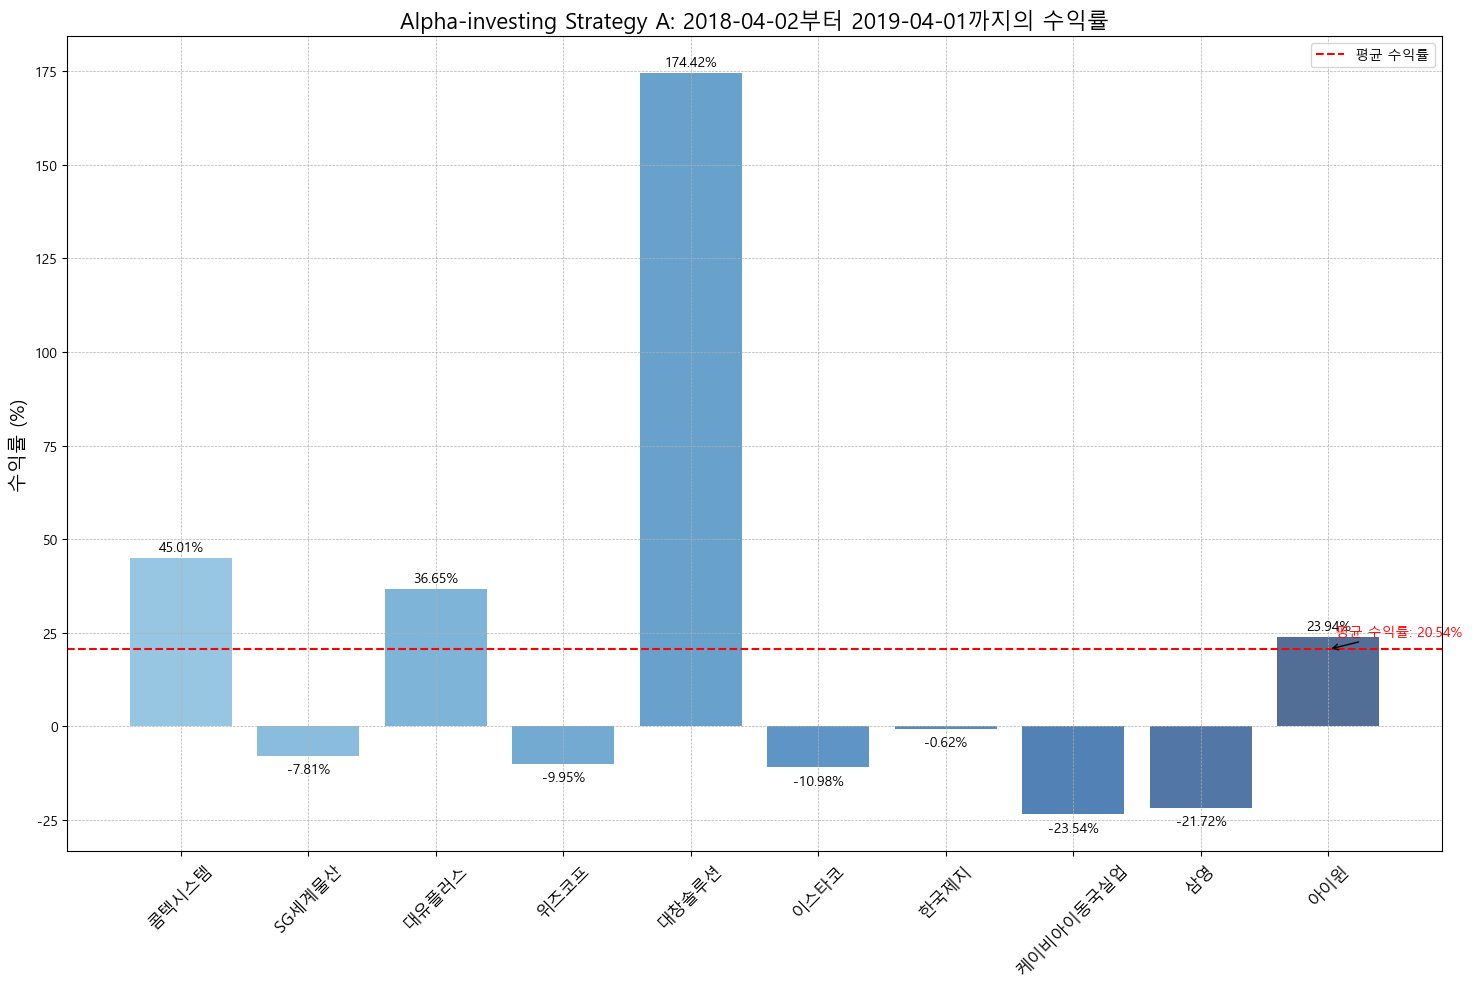

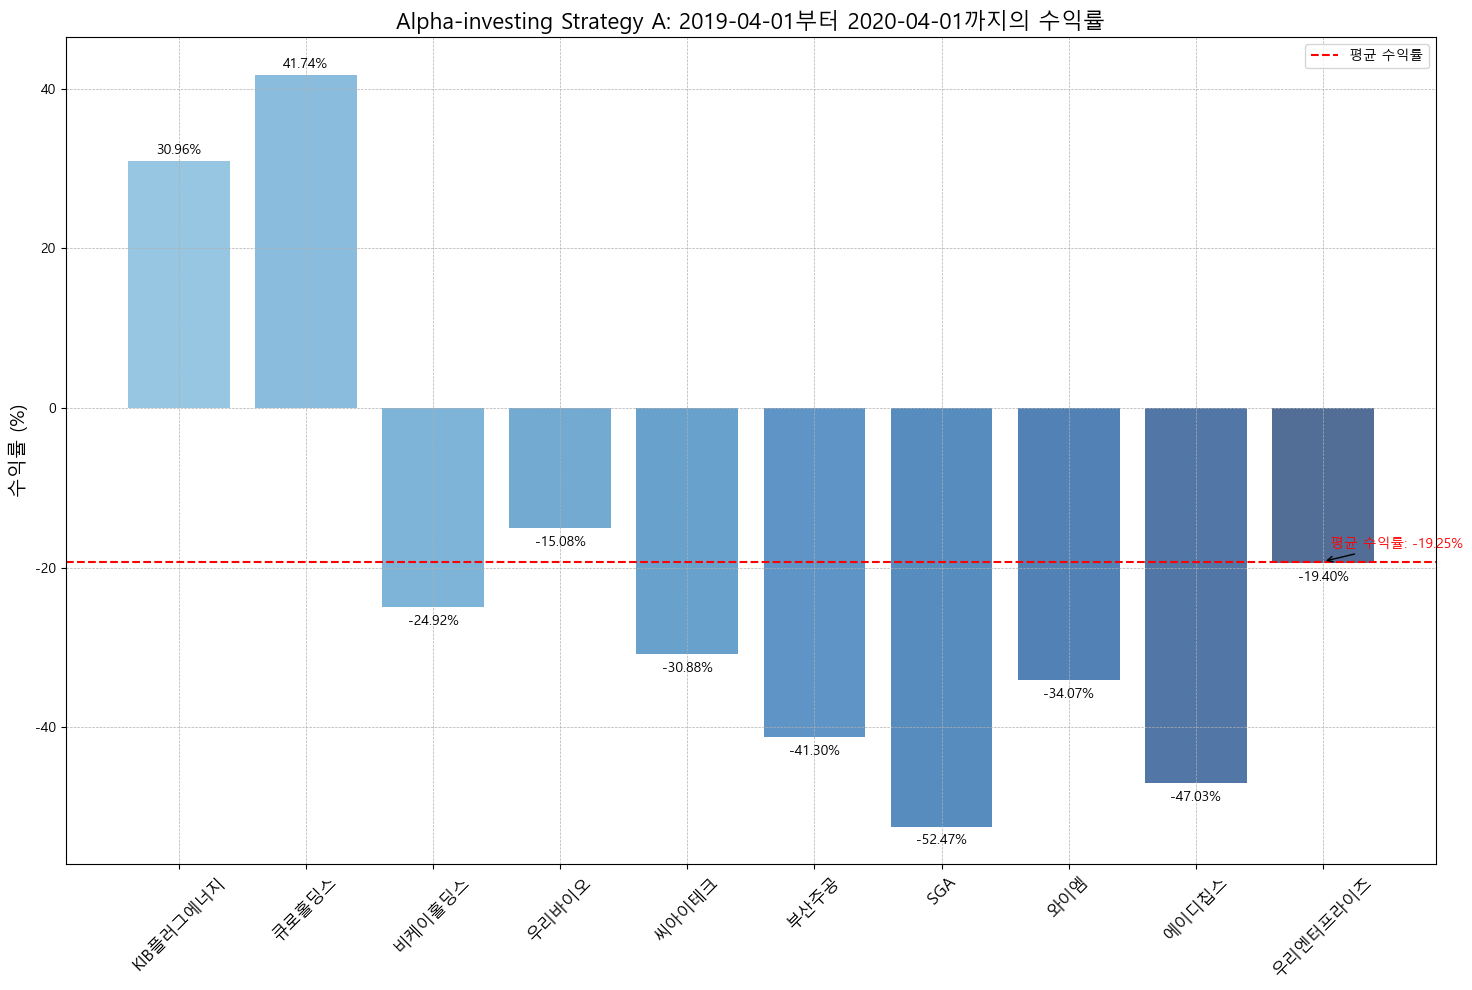

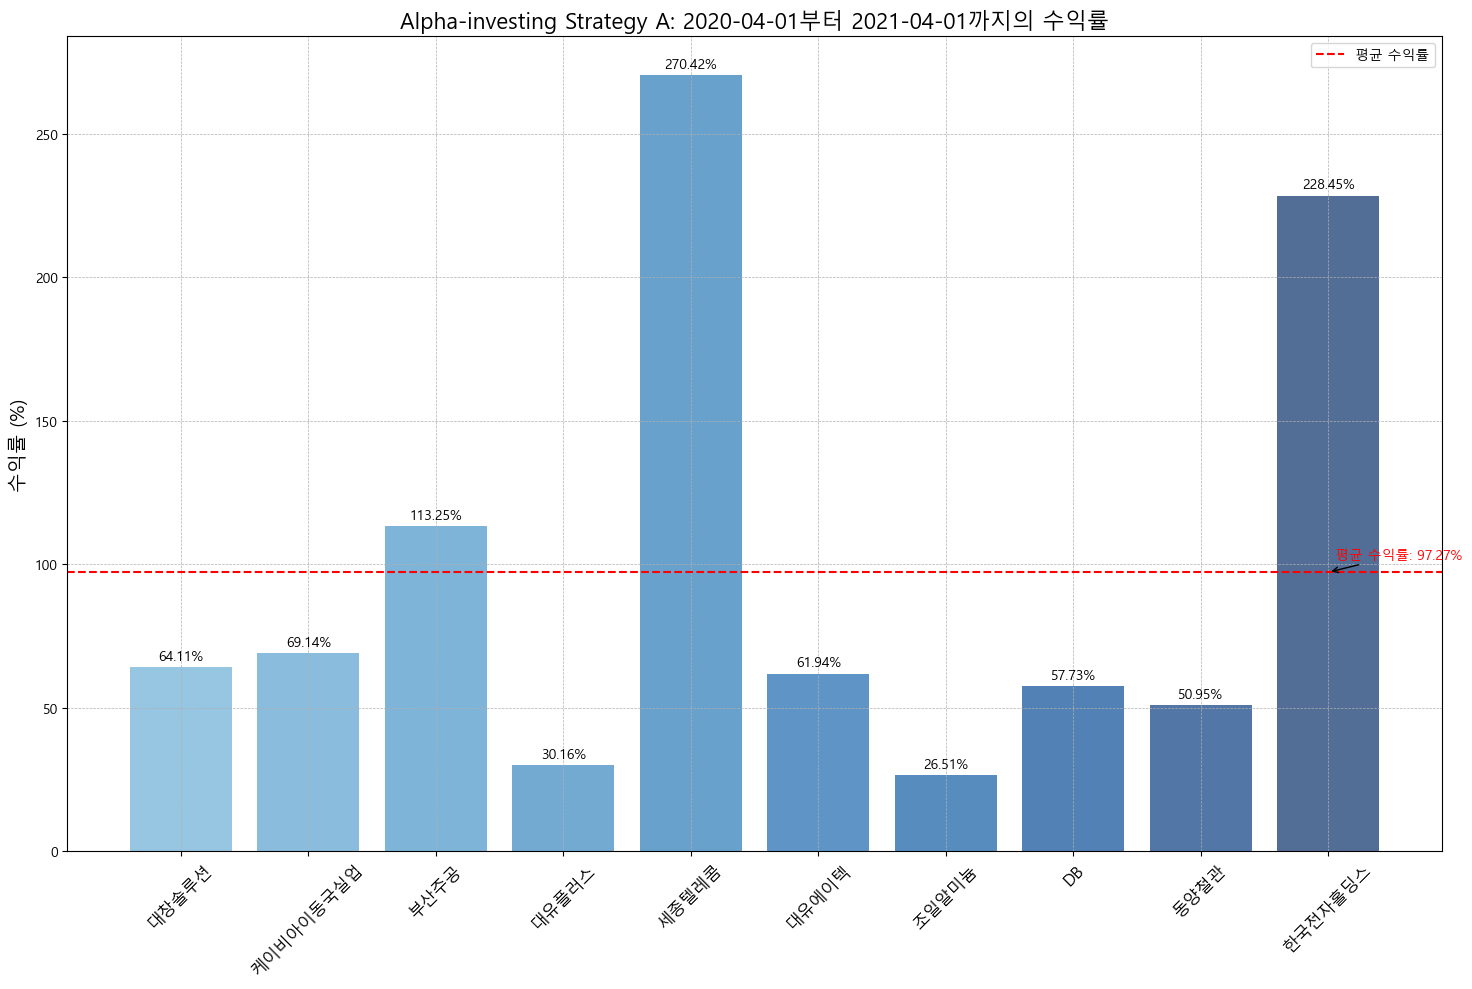

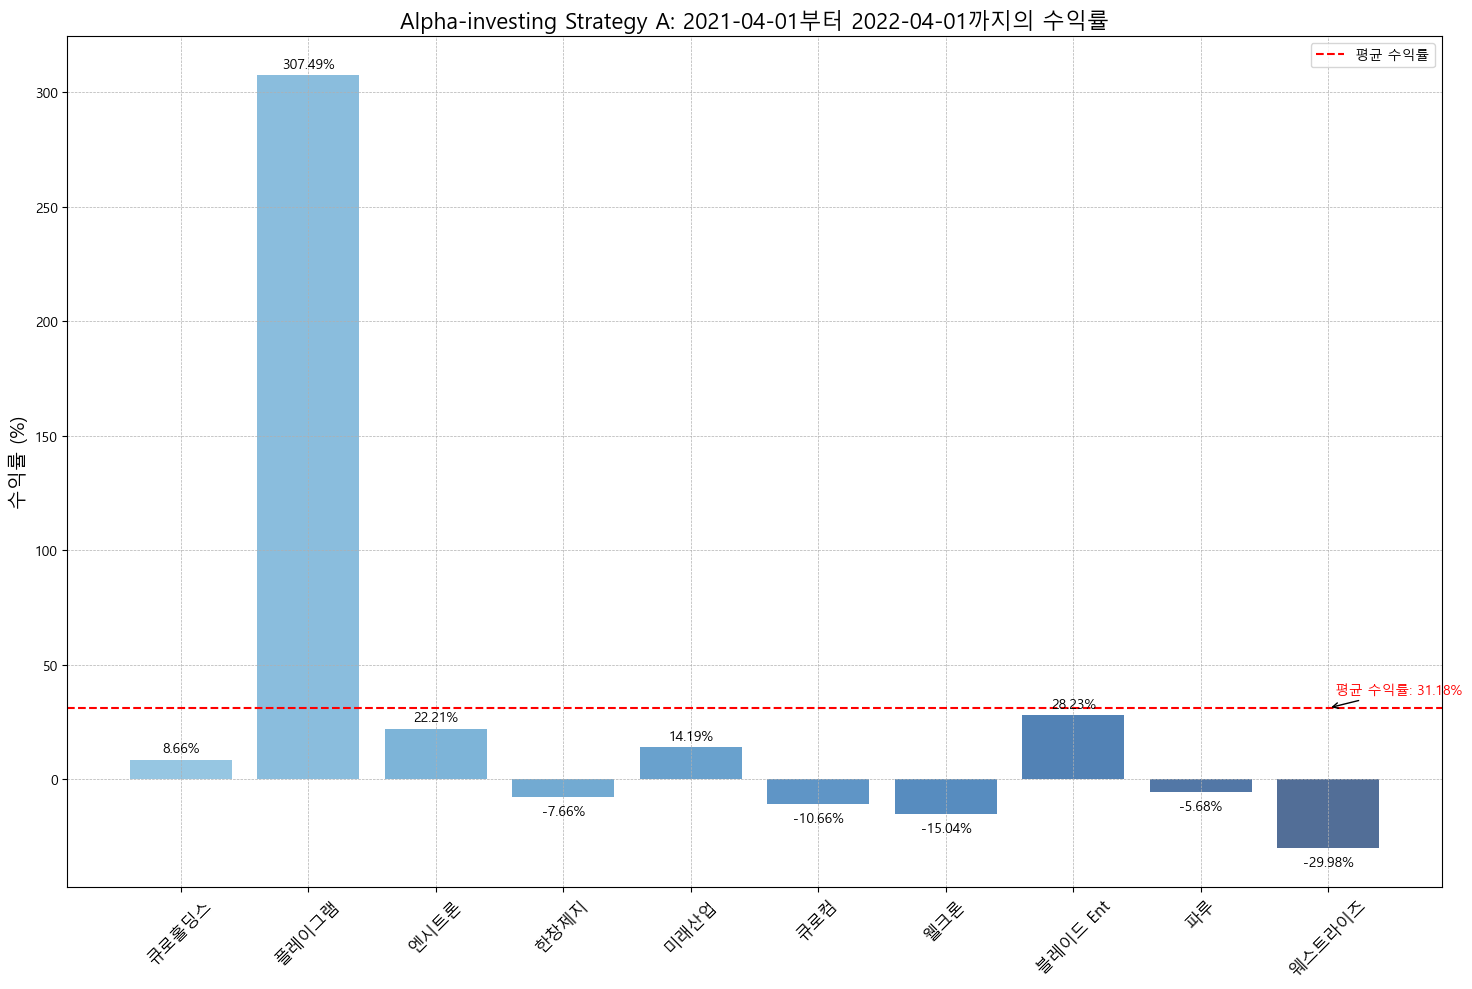

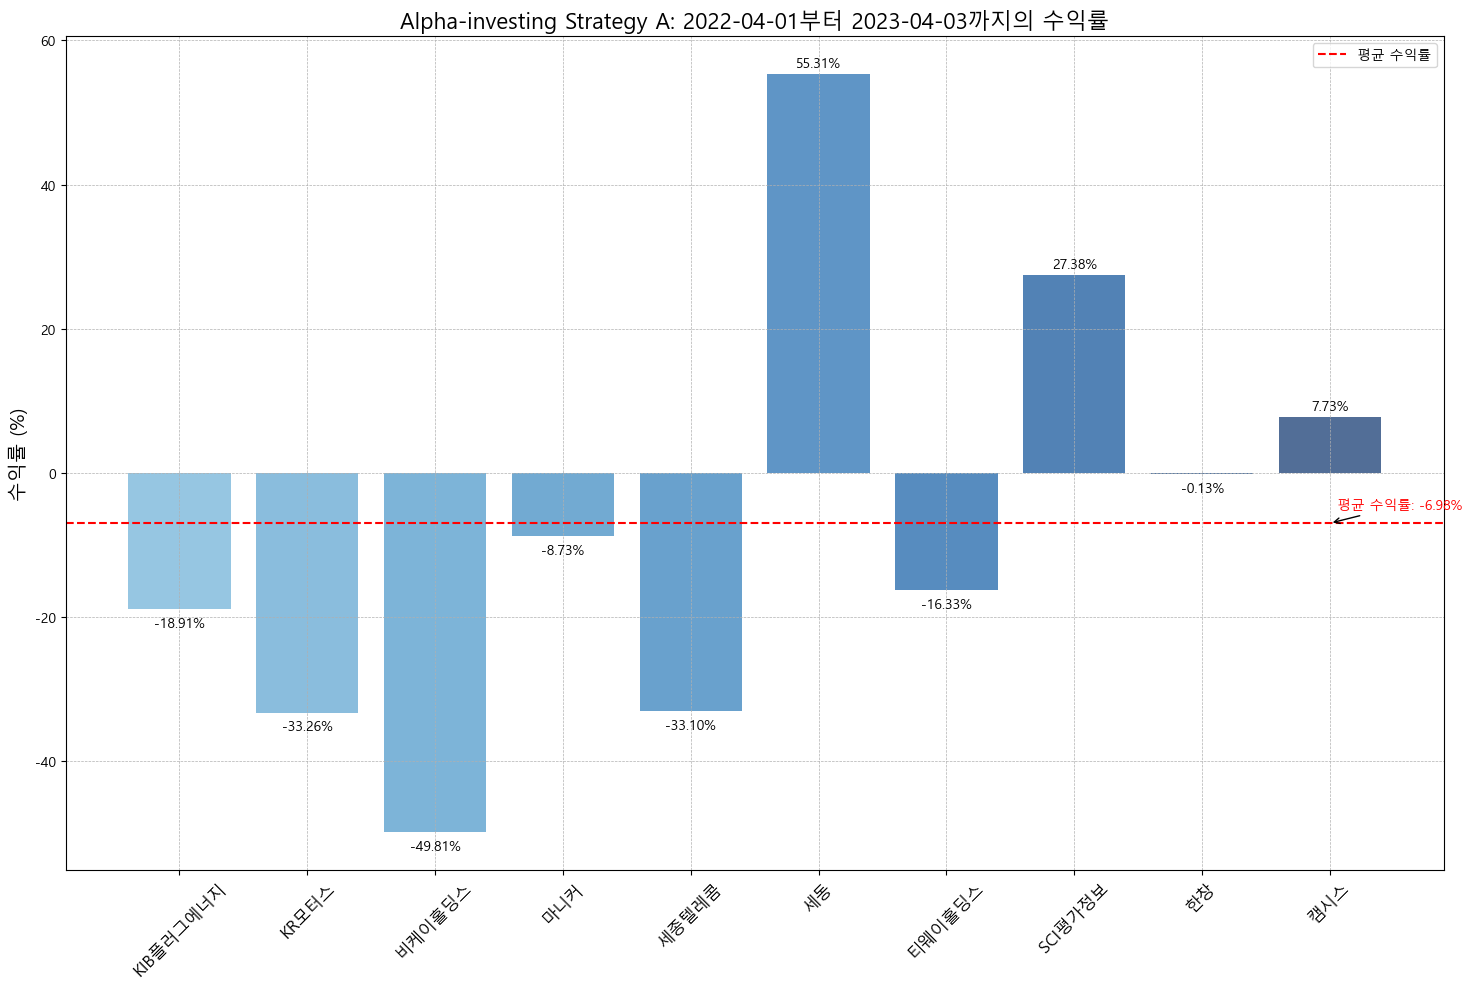

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드하기
close_df = pd.read_csv('close_df.csv')

# 리밸런싱일 및 각 리밸런싱일에 선정된 종목 코드
rebalancing_dates = [
    '2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
    '2018-04-02', '2019-04-01', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03'
]
held_stocks = {
    '2013-04-01': ['003310', '000300', '035620', '065440', '008600', '068050', '010170', '011930', '002900', '090080'],
    '2014-04-01': ['036630', '006200', '102280', '038620', '128660', '094860', '004060', '019180', '036090', '067630'],
    '2015-04-01': ['012030', '082800', '137940', '094860', '131400', '052020', '054090', '076080', '052300', '042940'],
    '2016-03-31': ['005030', '015590', '018000', '088290', '002360', '077500', '126560', '024900', '009810', '012610'],
    '2017-04-03': ['012160', '000180', '006490', '006340', '002880', '052460', '038110', '082850', '099410', '053280'],
    '2018-04-02': ['031820', '004060', '000300', '038620', '096350', '015020', '027970', '001620', '003720', '090150'],
    '2019-04-01': ['015590', '051780', '050090', '082850', '004920', '005030', '049470', '007530', '054630', '037400'],
    '2020-04-01': ['096350', '001620', '005030', '000300', '036630', '002880', '018470', '012030', '008970', '006200'],
    '2021-04-01': ['051780', '009810', '101400', '009460', '025560', '040350', '065950', '044480', '043200', '064090'],
    '2022-04-01': ['015590', '000040', '050090', '027740', '036630', '053060', '004870', '036120', '005110', '050110'],
    '2023-04-03': ['004410', '094860', '096350', '058400', '000890', '102280', '033540', '000040', '004060', '035890']
}


# 종목코드와 매칭되는 기업명
company_names_mapping = {
    '003310': '대주산업', '000300': '대유플러스', '035620': '바른손이앤에이', '065440': '이루온', '008600': '윌비스', '068050': '팬엔터테인먼트',
    '010170': '대한광통신', '011930': '신성이엔지', '002900': 'TYM', '090080': '평화산업', '036630': '세종텔레콤', '006200': '한국전자홀딩스',
    '102280': '쌍방울', '038620': '위즈코프', '128660': '피제이메탈', '094860': '네오리진', '004060': 'SG세계물산', '019180': '티에이치엔',
    '036090': '위지트', '067630': 'HLB생명과학', '012030': 'DB', '082800': '비보존 제약', '137940': '넥스트아이', '131400': '이브이첨단소재',
    '052020': '에스티큐브', '054090': '삼진엘앤디', '076080': '웰크론한텍', '052300': '씨티프라퍼티', '042940': '상지카일룸', '005030': '부산주공',
    '015590': 'KIB플러그에너지', '018000': '유니슨', '088290': '이원컴포텍', '002360': 'SH에너지화학', '077500': '유니퀘스트', '126560': '현대퓨처넷',
    '024900': '덕양산업', '009810': '플레이그램', '012610': '경인양행', '012160': '영흥', '000180': '성창기업지주', '006490': '인스코비',
    '006340': '대원전선', '002880': '대유에이텍', '052460': '아이크래프트', '038110': '에코플라스틱', '082850': '우리바이오', '099410': '동방선기',
    '053280': '예스24', '031820': '콤텍시스템', '096350': '대창솔루션', '015020': '이스타코', '027970': '한국제지', '001620': '케이비아이동국실업',
    '003720': '삼영', '090150': '아이윈', '051780': '큐로홀딩스', '050090': '비케이홀딩스', '004920': '씨아이테크', '049470': 'SGA',
    '007530': '와이엠', '054630': '에이디칩스', '037400': '우리엔터프라이즈', '018470': '조일알미늄', '008970': '동양철관', '101400': '엔시트론',
    '009460': '한창제지', '025560': '미래산업', '040350': '큐로컴', '065950': '웰크론', '044480': '블레이드 Ent', '043200': '파루',
    '064090': '웨스트라이즈', '000040': 'KR모터스', '027740': '마니커', '053060': '세동', '004870': '티웨이홀딩스', '036120': 'SCI평가정보',
    '005110': '한창', '050110': '캠시스', '004410': '서울식품', '058400': 'KNN', '000890': '보해양조', '033540': '파라텍', '035890': '서희건설'
}



# 그래프를 그리기 위한 함수 정의
def plot_selected_stock_returns(start_date, end_date, selected_stocks, company_names):
    # 시작일과 종료일 사이의 데이터만 추출
    period_df = close_df[(close_df['Date'] >= start_date) & (close_df['Date'] <= end_date)][selected_stocks]
    
    # 각 종목의 수익률 계산
    returns = (period_df.iloc[-1] - period_df.iloc[0]) / period_df.iloc[0]
    
    # 평균 수익률 계산
    average_return = returns.mean()

    # 시각화
    fig, ax = plt.subplots(figsize=(15, 10))
    colors = plt.cm.Blues(np.linspace(0.5, 1, len(returns)))

    # 각 종목의 수익률 막대그래프로 표시
    bars = ax.bar(company_names, returns.values * 100, color=colors, alpha=0.7)
    ax.axhline(average_return * 100, color='red', linestyle='--', linewidth=1.5, label='평균 수익률')
    
    # 각 막대 위에 수치 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3 if height > 0 else -15),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')
    
    # 평균 수익률 값 표시
    ax.annotate(f'평균 수익률: {average_return * 100:.2f}%',
                xy=(len(company_names)-1, average_return * 100),
                xytext=(5, 10),
                textcoords='offset points',
                fontsize=10,
                color='red',
                arrowprops=dict(facecolor='red', arrowstyle='->'))

    # 그래프 설정
    ax.set_title(f'Alpha-investing Strategy A: {start_date}부터 {end_date}까지의 수익률', fontsize=16)
    ax.set_ylabel('수익률 (%)', fontsize=14)
    ax.set_xticks(company_names)
    ax.set_xticklabels(company_names, rotation=45, fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # 그래프 레이아웃 조정 및 표시
    plt.tight_layout()
    plt.legend()
    plt.show()

# 각 리밸런싱일에 대한 그래프 생성
for date in rebalancing_dates[:-1]:  # 마지막 리밸런싱일은 다음 수익률이 없으므로 제외
    next_date = rebalancing_dates[rebalancing_dates.index(date) + 1]
    selected_stocks = held_stocks[date]
    company_names = [company_names_mapping[code] for code in selected_stocks]
    plot_selected_stock_returns(date, next_date, selected_stocks, company_names)


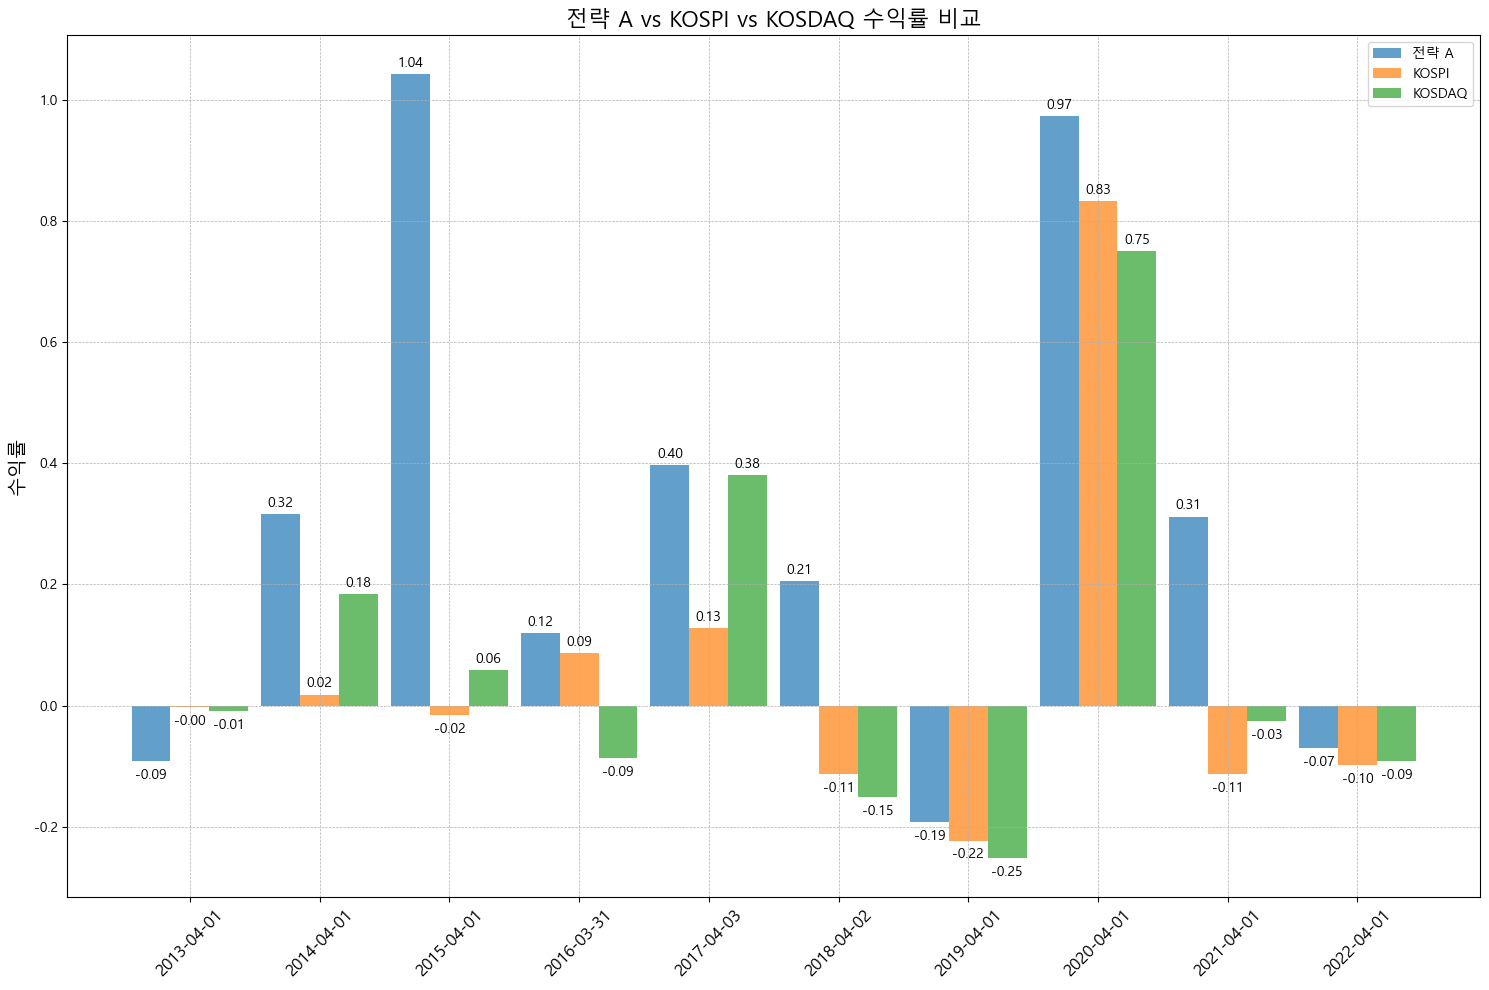

In [61]:
# 코스피와 코스닥의 데이터 로드하기
kospi_df = pd.read_csv('KOSPI Historical Data.csv')
kosdaq_df = pd.read_csv('KOSDAQ Historical Data.csv')

# 날짜 형식 변환
kospi_df['Date'] = pd.to_datetime(kospi_df['Date'])
kosdaq_df['Date'] = pd.to_datetime(kosdaq_df['Date'])

# 종가의 쉼표 제거 및 형변환
kospi_df['Price'] = kospi_df['Price'].str.replace(',', '').astype(float)
kosdaq_df['Price'] = kosdaq_df['Price'].str.replace(',', '').astype(float)

# 함수 정의: 주어진 시작일과 종료일 사이의 수익률 계산
def calculate_return(df, start_date, end_date):
    start_price = df[df['Date'] == start_date]['Price'].values[0]
    end_price = df[df['Date'] == end_date]['Price'].values[0]
    return (end_price - start_price) / start_price

# 각 리밸런싱일에 대한 전략 A, 코스피, 코스닥 수익률 계산
strategy_a_returns = []
kospi_returns = []
kosdaq_returns = []

for i in range(len(rebalancing_dates) - 1):
    start_date = rebalancing_dates[i]
    end_date = rebalancing_dates[i + 1]
    
    # 전략 A의 수익률
    strategy_a_stocks = held_stocks[start_date]
    period_df = close_df[(close_df['Date'] >= start_date) & (close_df['Date'] <= end_date)][strategy_a_stocks]
    strategy_a_return = ((period_df.iloc[-1] - period_df.iloc[0]) / period_df.iloc[0]).mean()
    strategy_a_returns.append(strategy_a_return)
    
    # 코스피의 수익률
    kospi_return = calculate_return(kospi_df, start_date, end_date)
    kospi_returns.append(kospi_return)
    
    # 코스닥의 수익률
    kosdaq_return = calculate_return(kosdaq_df, start_date, end_date)
    kosdaq_returns.append(kosdaq_return)

# 데이터 로드하기
close_df = pd.read_csv('close_df.csv')

# 리밸런싱일 및 각 리밸런싱일에 선정된 종목 코드
rebalancing_dates = [
    '2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
    '2018-04-02', '2019-04-01', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03'
]
held_stocks = {
    '2013-04-01': ['003310', '000300', '035620', '065440', '008600', '068050', '010170', '011930', '002900', '090080'],
    '2014-04-01': ['036630', '006200', '102280', '038620', '128660', '094860', '004060', '019180', '036090', '067630'],
    '2015-04-01': ['012030', '082800', '137940', '094860', '131400', '052020', '054090', '076080', '052300', '042940'],
    '2016-03-31': ['005030', '015590', '018000', '088290', '002360', '077500', '126560', '024900', '009810', '012610'],
    '2017-04-03': ['012160', '000180', '006490', '006340', '002880', '052460', '038110', '082850', '099410', '053280'],
    '2018-04-02': ['031820', '004060', '000300', '038620', '096350', '015020', '027970', '001620', '003720', '090150'],
    '2019-04-01': ['015590', '051780', '050090', '082850', '004920', '005030', '049470', '007530', '054630', '037400'],
    '2020-04-01': ['096350', '001620', '005030', '000300', '036630', '002880', '018470', '012030', '008970', '006200'],
    '2021-04-01': ['051780', '009810', '101400', '009460', '025560', '040350', '065950', '044480', '043200', '064090'],
    '2022-04-01': ['015590', '000040', '050090', '027740', '036630', '053060', '004870', '036120', '005110', '050110'],
    '2023-04-03': ['004410', '094860', '096350', '058400', '000890', '102280', '033540', '000040', '004060', '035890']
}

# 변수 초기화 후 다시 수익률 계산
strategy_a_returns = []
kospi_returns = []
kosdaq_returns = []

for i in range(len(rebalancing_dates) - 1):
    start_date = rebalancing_dates[i]
    end_date = rebalancing_dates[i + 1]
    
    # 전략 A의 수익률
    strategy_a_stocks = held_stocks[start_date]
    period_df = close_df[(close_df['Date'] >= start_date) & (close_df['Date'] <= end_date)][strategy_a_stocks]
    strategy_a_return = ((period_df.iloc[-1] - period_df.iloc[0]) / period_df.iloc[0]).mean()
    strategy_a_returns.append(strategy_a_return)
    
    # 코스피의 수익률
    kospi_return = calculate_return(kospi_df, start_date, end_date)
    kospi_returns.append(kospi_return)
    
    # 코스닥의 수익률
    kosdaq_return = calculate_return(kosdaq_df, start_date, end_date)
    kosdaq_returns.append(kosdaq_return)

def plot_benchmark_comparison(strategy_returns, kospi_returns, kosdaq_returns, rebalancing_dates):
    # 시각화 설정
    bar_width = 0.3
    index = np.arange(len(strategy_returns))
    
    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(15, 10))
    
    bars1 = ax.bar(index, strategy_returns, bar_width, label='전략 A', alpha=0.7)
    bars2 = ax.bar(index + bar_width, kospi_returns, bar_width, label='KOSPI', alpha=0.7)
    bars3 = ax.bar(index + 2 * bar_width, kosdaq_returns, bar_width, label='KOSDAQ', alpha=0.7)
    
    # 각 막대 위에 수치 표시
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3 if height > 0 else -15),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, color='black')
    
    # 그래프 설정
    ax.set_title('전략 A vs KOSPI vs KOSDAQ 수익률 비교', fontsize=16)
    ax.set_ylabel('수익률', fontsize=14)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(rebalancing_dates[:-1], rotation=45, fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    # 그래프 레이아웃 조정 및 표시
    plt.tight_layout()
    plt.show()

# 그래프 생성
plot_benchmark_comparison(strategy_a_returns, kospi_returns, kosdaq_returns, rebalancing_dates)